In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from edward.models import Normal

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1038: UserWarning: Bad val "GTKAgg" on line #32
	"backend      : GTKAgg
"
	in file "/Users/adamwheeler/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string 'gtkagg': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
  (val, error_details, msg))
/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [121]:
nstars = 500
nlabels = 4
npix = 5

sigmaCoeffs = 0.5
sigmaLabels = 1.0
sigmaF = 1e-1

coeffs_true = np.random.randn(nlabels, npix)*sigmaCoeffs

def toy_data(nstars, nlabels, npix, coeffs):
    labels = np.random.randn(nlabels, nstars)*sigmaLabels
    mean_F = np.dot(np.transpose(coeffs), labels)
    F =  mean_F + np.random.randn(npix, nstars)*sigmaF
    return F, labels

F_train, labels_train = toy_data(nstars, nlabels, npix, coeffs_true)
F_test, labels_test = toy_data(nstars, nlabels, npix, coeffs_true)

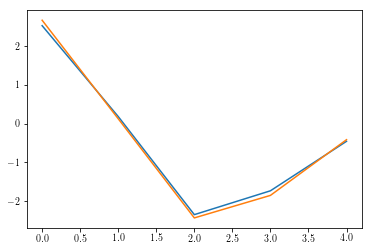

In [122]:
plt.plot(np.dot(coeffs_true.T, labels_train)[:, 0])
plt.plot(F_train[:, 0])

In [143]:
coeffs = Normal(loc=tf.zeros([nlabels, npix]), scale=sigmaCoeffs)
labels = Normal(loc=tf.zeros([nlabels, nstars]), scale=sigmaLabels)
F = Normal(loc=tf.matmul(tf.transpose(coeffs), labels), scale=sigmaF)

In [152]:
qcoeffs = ed.models.PointMass(params=tf.Variable(tf.zeros([nlabels, npix])))
op = ed.MAP({coeffs: qcoeffs}, {F:F_train, labels:labels_train})
op.run()

/usr/local/lib/python3.6/site-packages/edward/util/random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


1000/1000 [100%] ██████████████████████████████ Elapsed: 2s | Loss: 579.061


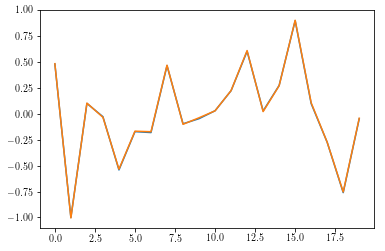

In [155]:
plt.plot(qcoeffs.eval().ravel())
plt.plot(coeffs_true.ravel())

In [5]:
inference = ed.KLqp({coeffs: qCoeffs}, data={F: F_train, labels: labels_train})
inference.run(n_samples=5, n_iter=25000)

/usr/local/lib/python3.6/site-packages/edward/util/random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


25000/25000 [100%] ██████████████████████████████ Elapsed: 35s | Loss: 631573632.000


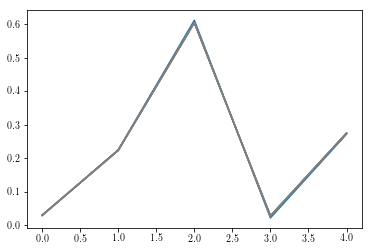

In [158]:
import matplotlib.pyplot as plt
plt.plot(range(npix), coeffs_true[2, :])
samples = coeffs.sample(20).eval()
for i in range(20):
    plt.plot(range(npix), samples[i][2, :], color="grey", alpha=0.3)
    